In [57]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
from sklearn.manifold import spectral_embedding
import seaborn as sns
import numpy as np
import math

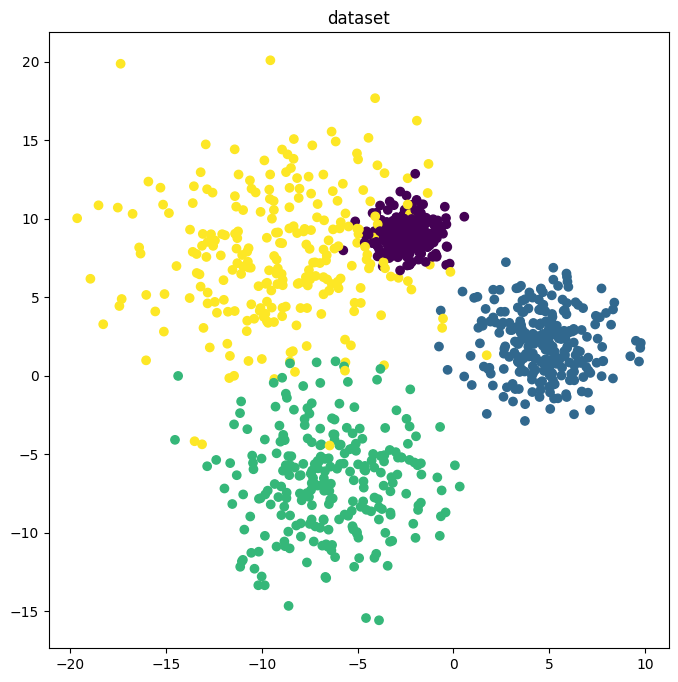

In [58]:

# Generate a difficult dataset with overlapping classes
X, _ = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.title("dataset")
plt.show()


In [7]:
def plot_base_solution(base_cluster_solutions,data):
  plt.figure(figsize=(15, 4))
  for i, labels in enumerate(base_cluster_solutions, 1):
      plt.subplot(1, len(base_cluster_solutions), i)
      plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
      plt.title(f'Base Clustering Solution {i}')

  plt.tight_layout()
  plt.show()


In [59]:

# Apply clustering algorithms
kmeans = KMeans(n_clusters=4, random_state=42)
spectral = SpectralClustering(n_clusters=4, random_state=42)
ap = AffinityPropagation(preference=-50)  # Adjust preference parameter as needed
hierarchical = AgglomerativeClustering(n_clusters=4)

# Store clustering solutions in an array
base_cluster_solutions = []

# KMeans
kmeans_labels = kmeans.fit_predict(X)
base_cluster_solutions.append(kmeans_labels)

# Spectral Clustering
spectral_labels = spectral.fit_predict(X)
base_cluster_solutions.append(spectral_labels)

# DBSCAN
ap_labbels = ap.fit_predict(X)
base_cluster_solutions.append(ap_labbels)

# Hierarchical Clustering
hierarchical_labels = hierarchical.fit_predict(X)
base_cluster_solutions.append(hierarchical_labels)

# Convert the list of arrays into a numpy array
base_cluster_solutions = np.array(base_cluster_solutions)

# Print the shape of the array (number of clustering algorithms used, number of data points)
print("Shape of base_cluster_solutions:", base_cluster_solutions.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Shape of base_cluster_solutions: (4, 300)


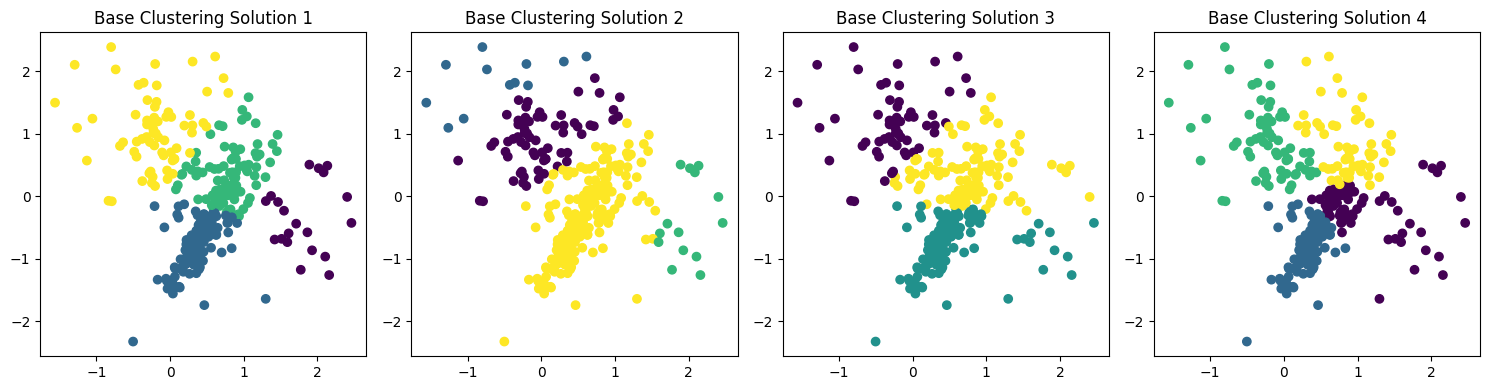

In [60]:
plot_base_solution(base_cluster_solutions,X)

In [51]:
def final_clustering_solution(distance_co_assoc_matrix,data,n_clusters):
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
    final_labels = hc.fit_predict(distance_co_assoc_matrix)

    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], c=final_labels, cmap='viridis')
    plt.title('Final Clustering Solution')
    plt.show()
    return final_labels

In [39]:
def pairwise_distances(coordinates):
    return distance_matrix(coordinates, coordinates)


In [40]:
def calculate_co_association_with_co_occur(base_cluster_solutions):

  n_data =  len(base_cluster_solutions[0])
  n_clusters =  len(base_cluster_solutions)

  # Create the co-association matrix
  co_assoc_matrix = np.zeros((n_data, n_data))

  co_assoc_matrix = np.zeros((n_data, n_data))
  for i in range(n_data):
      for j in range(i, n_data):
          val = sum(base_cluster_solutions[k][i] == base_cluster_solutions[k][j] for k in range(n_clusters))
          co_assoc_matrix[i][j] = co_assoc_matrix[j][i] = val

  return co_assoc_matrix

In [61]:
# co-association matrix calculation
co_assoc_matrix_co_occur = calculate_co_association_with_co_occur(base_cluster_solutions)
co_assoc_matrix_co_occur = 4 - co_assoc_matrix_co_occur
dis_matrix = pairwise_distances(X)

modified_co_assoc_matrix = co_assoc_matrix_co_occur * dis_matrix


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


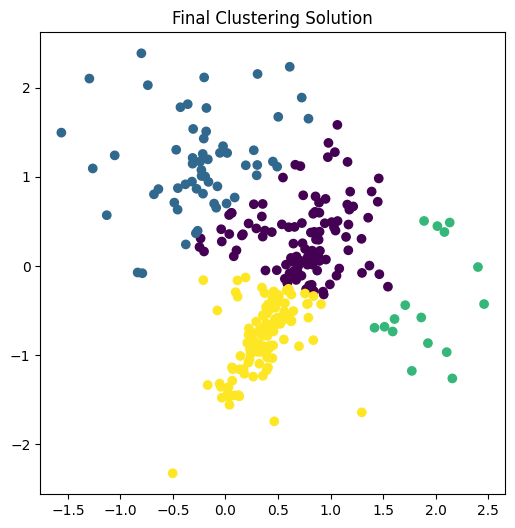

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


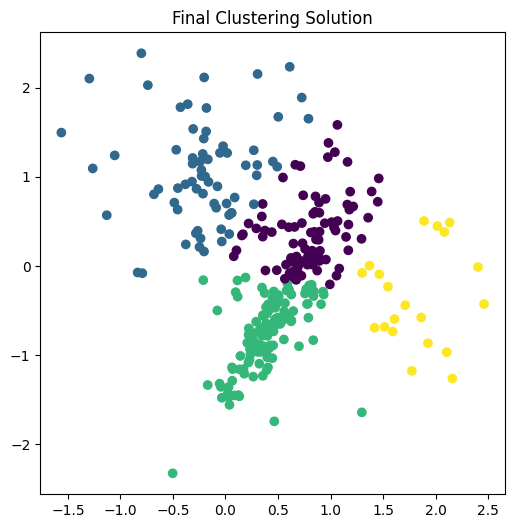

In [62]:
m_lables = final_clustering_solution(modified_co_assoc_matrix,X,4)
c_lables = final_clustering_solution(co_assoc_matrix_co_occur,X,4)


In [63]:
print("Silhouette Score:") # ranges from -1 (worst) to 1 (best)
print("for m ->", silhouette_score(X,m_lables))
print("for c ->", silhouette_score(X,c_lables))
print("Calinski-Harabasz Score:") # Higher values indicate better separation.
print("for m ->",calinski_harabasz_score(X, m_lables))
print("for c ->",calinski_harabasz_score(X, c_lables))
print("Davies-Bouldin Score:") # Lower values indicate better separation
print("for m ->", davies_bouldin_score(X, m_lables))
print("for c ->", davies_bouldin_score(X, c_lables))


Silhouette Score:
for m -> 0.4264954622901569
for c -> 0.43096075139622164
Calinski-Harabasz Score:
for m -> 245.33209354840872
for c -> 252.55789575431385
Davies-Bouldin Score:
for m -> 0.8051585560422352
for c -> 0.8083216993369761
